<p style="text-align:center">
    <img src="EMI LOGO COPY.png" width="300">
    
</p>

<div style="text-align: center;">
    <h1>Modeling of antigen expression quantity associated with prostate cancer detection.</h1>
</div>

In [47]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
import joblib

#loading dataset
df = pd.read_csv('prostate_dataset.txt', sep='\t')
df.head()


,col,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [4]:
#dropping columns col & train (unnecessary columns)
df = df.drop(columns=["col", "train"])

In [8]:
#checking missing values
print(df.isnull().sum())

#descriptive statistics
print(df.describe())

lcavol     0
lweight    0
age        0
lbph       0
svi        0
lcp        0
gleason    0
pgg45      0
lpsa       0
dtype: int64
          lcavol    lweight        age       lbph        svi        lcp  \
count  97.000000  97.000000  97.000000  97.000000  97.000000  97.000000   
mean    1.350010   3.628943  63.865979   0.100356   0.216495  -0.179366   
std     1.178625   0.428411   7.445117   1.450807   0.413995   1.398250   
min    -1.347074   2.374906  41.000000  -1.386294   0.000000  -1.386294   
25%     0.512824   3.375880  60.000000  -1.386294   0.000000  -1.386294   
50%     1.446919   3.623007  65.000000   0.300105   0.000000  -0.798508   
75%     2.127041   3.876396  68.000000   1.558145   0.000000   1.178655   
max     3.821004   4.780383  79.000000   2.326302   1.000000   2.904165   

         gleason       pgg45       lpsa  
count  97.000000   97.000000  97.000000  
mean    6.752577   24.381443   2.478387  
std     0.722134   28.204035   1.154329  
min     6.000000    0.0000

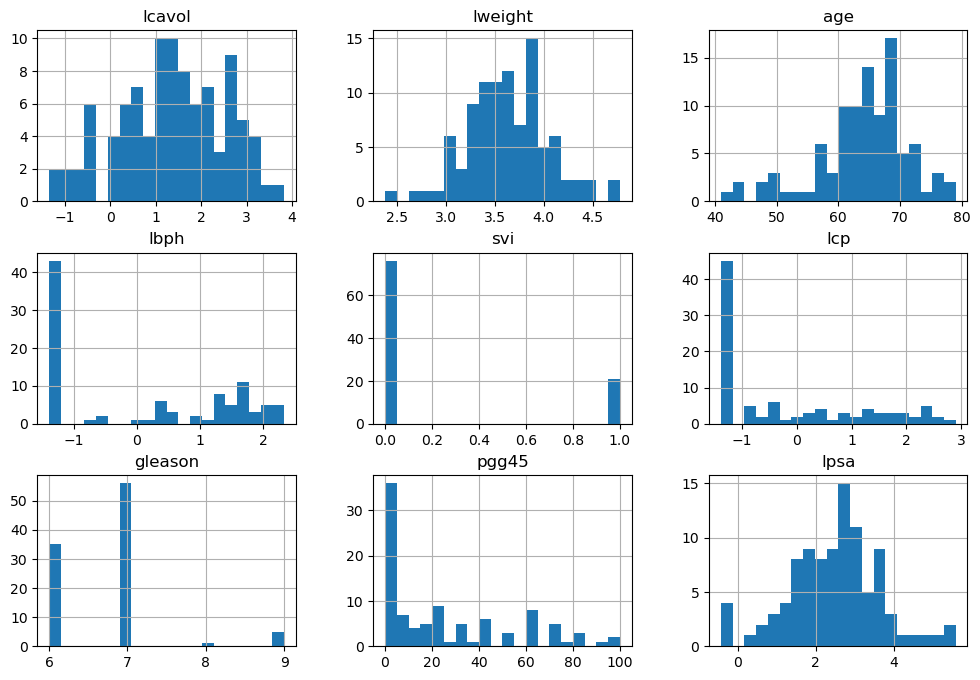

In [6]:
#histograms for all variables
df.hist(bins=20, figsize=(12, 8))
plt.show()

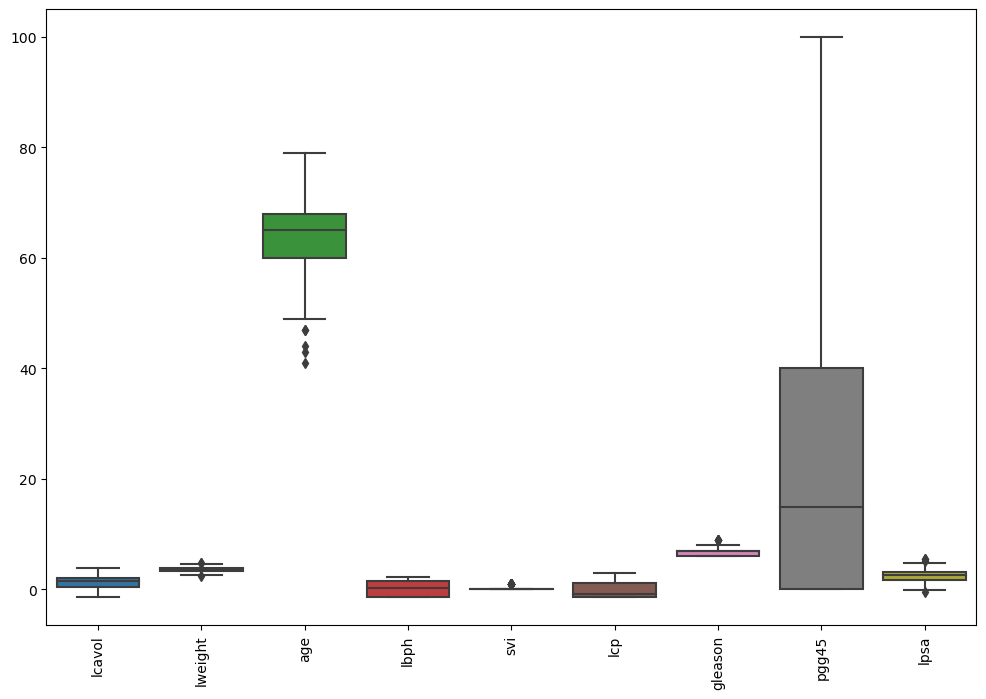

In [7]:
# Boxplot for each variable
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

C:\Users\PARAV\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


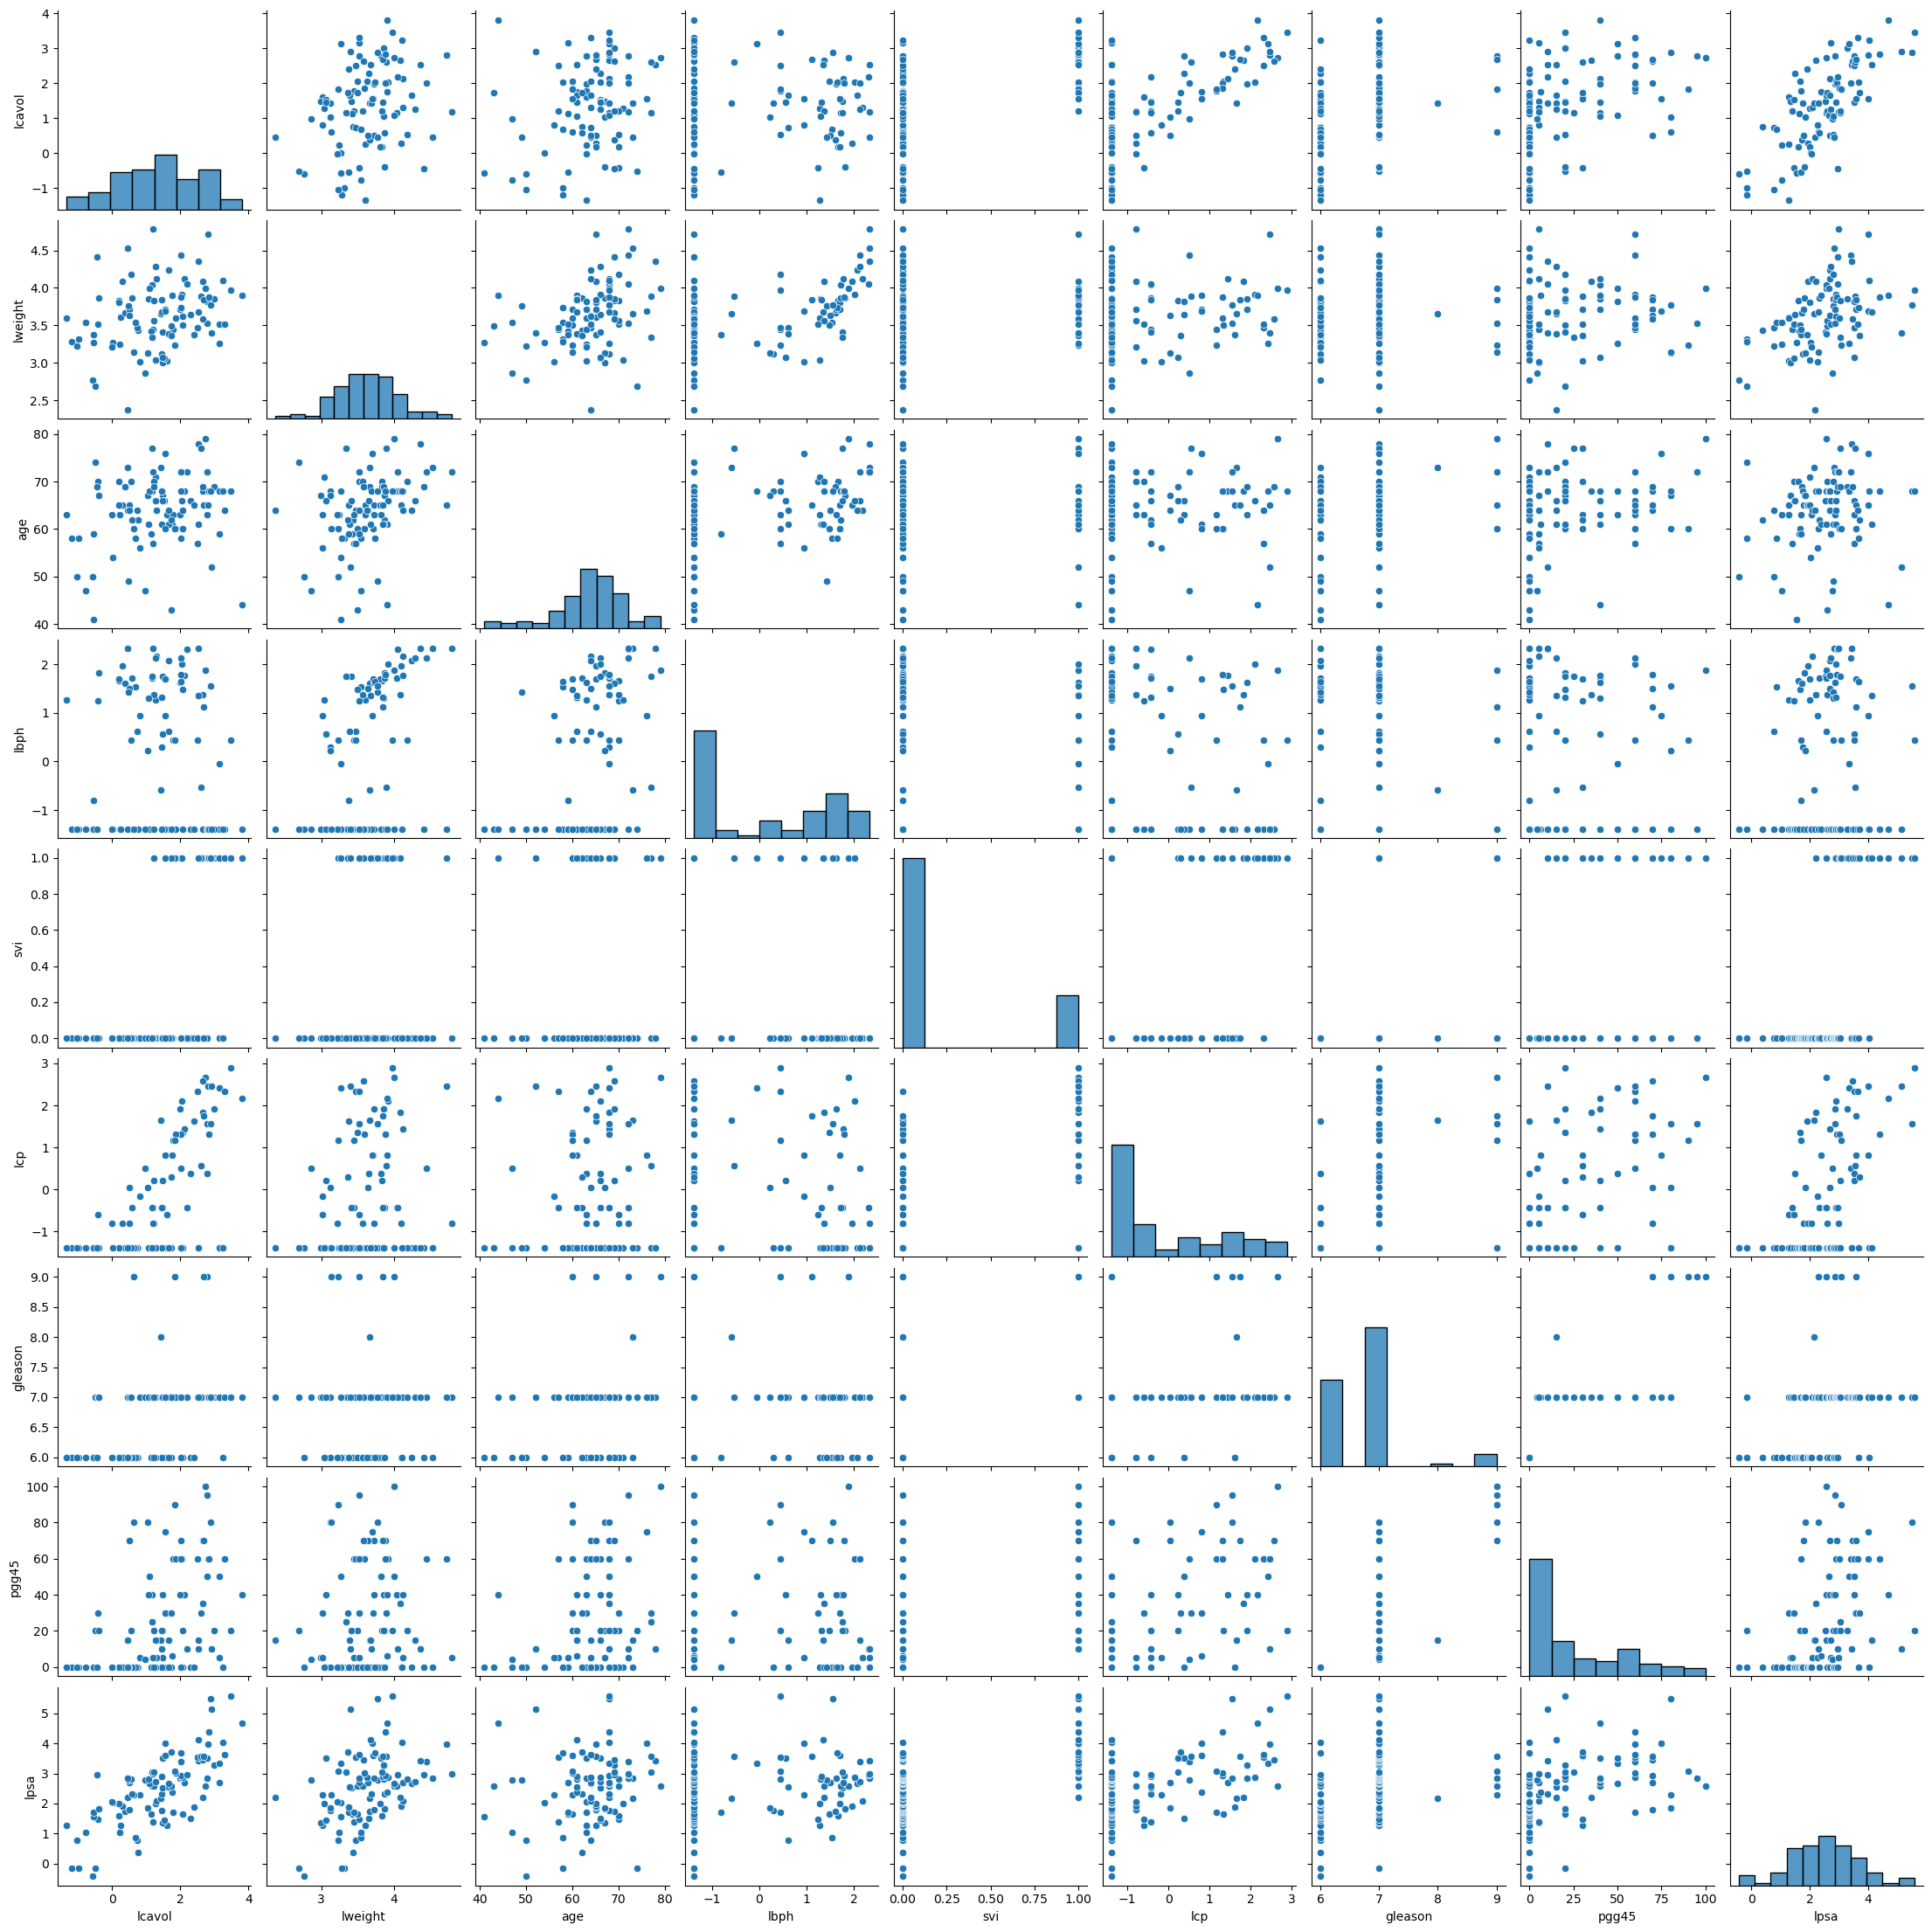

In [9]:
#pair plot for exploratory analysis
sns.pairplot(df)
plt.show()

<h3>Key Insights:</h3>

<ol>
    <li><strong>Strong Predictors:</strong>
        <ul>
            <li>Variables like lcavol, lweight, pgg45, gleason, and svi show strong correlations with lpsa and will be the most significant predictors in the regression model.</li>
        </ul>
    </li>
    <li><strong>Outliers and Variability:</strong>
        <ul>
            <li>pgg45 and age have significant outliers and large spreads. These may represent key cases of aggressive cancer or early-onset prostate cancer, which need to be treated carefully during modeling. they can either be removed or transformed if they disproportionately affect model performance.</li>
        </ul>
    </li>
    <li><strong>Weak Predictors:</strong>
        <ul>
            <li>Variables like age and lbph exhibit weak correlations with lpsa, suggesting that these variables may not contribute significantly to the predictive power of the model. However, their inclusion in regularization techniques (Ridge, Lasso) might still prove useful for refining the model.</li>
        </ul>
    </li>
    <li><strong>Target Variable lpsa:</strong>
        <ul>
            <li>The target variable lpsa shows a relatively normal distribution, which is favorable for linear regression modeling. The strong correlations between lpsa and key variables like lcavol and pgg45 suggest that a linear regression model should perform well, though regularization may be necessary to account for multicollinearity among predictors.</li>
        </ul>
    </li>
</ol>

In [16]:
#separate predictor variables from target variable
X = df.drop(columns="lpsa")
y = df["lpsa"]

#standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [23]:
# Train a linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = linear_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Linear Regression MSE: {mse}')

Linear Regression MSE: 0.34699178917613943


In [24]:
# Train a Ridge regression model with λ=2.14
ridge_reg = Ridge(alpha=2.14)
ridge_reg.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_ridge = ridge_reg.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Ridge Regression MSE: {mse_ridge}')

Ridge Regression MSE: 0.3457948033384909


In [36]:
# List of potential lambda (alpha) values to test
alphas = [0.1, 0.5, 1.0, 2.14, 5.0, 10.0]

# Initialize Ridge regression with cross-validation
ridge_cv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', cv=5)

# Fit the model on the training data
ridge_cv.fit(X_train, y_train)

# Best lambda (alpha) selected by cross-validation
best_alpha = ridge_cv.alpha_
print(f'Optimal lambda (α) found: {best_alpha}')

# Predict and evaluate the model using the optimal lambda
y_pred_ridge_cv = ridge_cv.predict(X_test)
mse_ridge_cv = mean_squared_error(y_test, y_pred_ridge_cv)
print(f'Ridge Regression MSE with optimal λ: {mse_ridge_cv}')

Optimal lambda (α) found: 2.14
Ridge Regression MSE with optimal λ: 0.3457948033384909


In [30]:
# Train a Lasso regression model with λ=0.08
lasso_reg = Lasso(alpha=0.08)
lasso_reg.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_lasso = lasso_reg.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso Regression MSE: {mse_lasso}')

Lasso Regression MSE: 0.42661792329641274


In [34]:
# Define a range of potential lambda (alpha) values to test
alphas = [0.01, 0.05, 0.08, 0.1, 0.2, 0.5, 1.0]

# Initialize Lasso regression with cross-validation
lasso_cv = LassoCV(alphas=alphas, cv=5)

# Fit the model on the training data
lasso_cv.fit(X_train, y_train)

# Best lambda (alpha) selected by cross-validation
best_alpha_lasso = lasso_cv.alpha_
print(f'Optimal lambda (α) for Lasso found: {best_alpha_lasso}')

# Predict and evaluate the model using the optimal lambda
y_pred_lasso_cv = lasso_cv.predict(X_test)
mse_lasso_cv = mean_squared_error(y_test, y_pred_lasso_cv)
print(f'Lasso Regression MSE with optimal λ: {mse_lasso_cv}')

Optimal lambda (α) for Lasso found: 0.08
Lasso Regression MSE with optimal λ: 0.42661792329641274


In [42]:
# Define a range of l1_ratios to test
l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9]

# Initialize ElasticNet regression with cross-validation
elastic_net_cv = ElasticNetCV(alphas=[0.08], l1_ratio=l1_ratios, cv=5)

# Fit the model on the training data
elastic_net_cv.fit(X_train, y_train)

# Get the best l1_ratio and alpha (lambda) values
best_l1_ratio = elastic_net_cv.l1_ratio_
best_alpha_enet = elastic_net_cv.alpha_
print(f'Optimal alpha for Elastic Net: {best_alpha_enet}')
print(f'Optimal l1_ratio for Elastic Net: {best_l1_ratio}')

# Predict and evaluate the model using the optimal alpha and l1_ratio
y_pred_enet = elastic_net_cv.predict(X_test)
mse_enet = mean_squared_error(y_test, y_pred_enet)
print(f'Elastic Net MSE with optimal λ and α: {mse_enet}')


Optimal alpha for Elastic Net: 0.08
Optimal l1_ratio for Elastic Net: 0.9
Elastic Net MSE with optimal λ and α: 0.4197625474111527


<h2>Interpretation of Results</h2>

<ul>
    <li><strong>Optimal α (alpha) for Elastic Net:</strong> 0.08</li>
    <li><strong>Optimal l1_ratio for Elastic Net:</strong> 0.9</li>
    <li><strong>Elastic Net MSE with optimal λ and α:</strong> 0.4197</li>
</ul>

<h3>Interpretation of Results</h3>

<h4>1. Optimal α (alpha = 0.08)</h4>
<p>Since this value is the same as the optimal value for Lasso, it suggests that the level of regularization required by Elastic Net is closer to that of Lasso rather than Ridge.</p>

<h4>2. Optimal l1_ratio = 0.9</h4>
<p>this value means that Elastic Net is using <strong>90% Lasso (L1)</strong> regularization and <strong>10% Ridge (L2)</strong> regularization. This indicates that Lasso-style regularization, which encourages sparsity and selects only the most relevant features, is more dominant for this dataset. L1 regularization drives some coefficients to zero, effectively performing feature selection, while L2 regularization (Ridge) shrinks coefficients without eliminating them. The dominance of L1 suggests that a sparse model (few non-zero coefficients) is preferred.</p>

<h4>3. MSE = 0.4197</h4>
<p>The <strong>Mean Squared Error (MSE)</strong> of 0.4197 is higher than the MSE for Ridge (0.346) but lower than Lasso (0.426). This means that while the Elastic Net model provides some balance between Lasso and Ridge regularization, in this case, <strong>Ridge</strong> performed slightly better, yielding a lower MSE on the test data.</p>

<h3>Key Insights</h3>
<ul>
    <li><strong>Elastic Net Performance:</strong> The Elastic Net model, with an l1_ratio of 0.9, is much closer to Lasso in behavior. This makes sense, given the sparsity-inducing nature of Lasso and the fact that the dataset may contain irrelevant or less influential features that benefit from being zeroed out.</li>
    <li><strong>MSE Comparison:</strong>
        <ul>
            <li><strong>Ridge MSE:</strong> 0.346</li>
            <li><strong>Lasso MSE:</strong> 0.427</li>
            <li><strong>Elastic Net MSE:</strong> 0.420</li>
        </ul>
        Ridge regression outperformed both Lasso and Elastic Net in terms of the lowest MSE, suggesting that for this dataset, a purely L2-regularized model (Ridge) provides the best balance between bias and variance, minimizing prediction errors on the test set.
    </li>
</ul>

In [44]:
# New patient data
new_patient = np.array([[2.8, 3, 70, -1.4, 1, 1.5, 7, 60]])

# Standardize the new patient data using the same scaler from training
new_patient_scaled = scaler.transform(new_patient)

# Predict the lpsa value using the trained Ridge model
predicted_lpsa = ridge_cv.predict(new_patient_scaled)

print(f'Predicted lpsa for the new patient: {predicted_lpsa[0]}')


Predicted lpsa for the new patient: 3.2741495565293945


C:\Users\PARAV\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [48]:
# Save the trained Ridge regression model to a file
joblib.dump(ridge_cv, 'ridge_model_final.pkl')

#save the scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']